# TP : SVM

## 1 - Cas linéaire

Dans cette première partie, nous nous intéressons à une SVM linéaire. Cette première version de SVM fournit un classifieur linéaire $h(x)$ paramétré par $w$ et $b$ séparant l'espace par l'hyperplan d'équation $w \cdot x + b = 0$


Formellement, on pose $(\mathbf{x_i},y_i)_{i=1}^n$ un ensemble de $n$ points
d'entraînement, avec $\mathbf{x_i} \in \mathbb{R}^d$ et $y_i \in \lbrace -1, 1
\rbrace.$\\
On résoud ensuite :
\begin{array}{ll}
\mbox{minimiser } &\frac{1}{2}~||\mathbf{w}||^2 + C \sum_{i=1}^n \zeta_i \\
\mbox{sous contraintes } &
\forall i, y_i(<\mathbf{w},\mathbf{x_i}> + b) \geq 1 - \zeta_i  \\
 & \forall i, \zeta_i  \geq 0\\
\end{array}


On obtient alors une suite de coefficients $(\alpha_i)_{i=1}^n, \alpha_i \geq 0$ et 


$\mathbf{w}=\sum_{i=1}^n \alpha_i y_i \mathbf{x_i}$

$h(\mathbf{x}) =  <\mathbf{w},\mathbf{x}> + b.$


Les vecteurs $\mathbf{x_i}$ tels que $\alpha_i > 0$ sont appelés
 $ \textbf{vecteurs supports}.$



In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Questions :


    
a) Générer un ensemble d’entraînement linéairement séparable. Composé de 50 exemples, avec 2 features. (On peut prendre par exemple des label positif pour x1 > 0.)
    - afficher cette ensemble d'entrainement avec les labels en couleurs.
    - entrainer un SVM linéaire (from sklearn.svm import LinearSVC)     
    - afficher l'ensemble de décision avec la fonction plot_boundary
    
b) Sur cette ensemble, rajouter du bruit aux $y$. (i.e. avec probabilité $p$, $y_i = 1-y_i$)
    - Afficher l'ensemble, entrainer un SVM linéaire et faire varier le paramètre C.
 
c) Cas du XOR : 
    - générer l'ensemble d'entrainement suivant :  
        X = ( 0,0       y =  (1
              1,0             0
              0,1             0
              1,1)            1)
              
    - afficher cette ensemble d'entrainement avec les labels en couleurs.
    - entrainer un SVM linéaire (from sklearn.svm import LinearSVC)     
    - afficher l'ensemble de décision avec la fonction plot_boundary
    

In [3]:
from sklearn.svm import LinearSVC
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

In [4]:
def plot_boundary(clf, X, y):
    h = 0.002
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, s = 100)
    plt.title('score : ' + str(clf.score(X,y)))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    

In [1]:

X = 
y = 
plt.scatter(X[:,0],X[:,1], c = y, s = 100)

SyntaxError: invalid syntax (<ipython-input-1-87bbd2273d80>, line 2)

### Xor

# 2- Cas non linéaire : 

"L'astuce du noyau" est une méthode permettant d'étendre l'espace
$\mathcal{H}$ d'hypothèses. L'idée est de plonger les données d'entraînements
via une fonction $\phi$ dans un espace de grande dimension $(feature\ 
space$). 

La fonction de décision $h$ de prédiction s'écrit maintenant :

$$ h(\mathbf{x}) =  \sum_{i=1}^n \alpha_i y_i \phi(x_i) \cdot \phi(x) + b = \sum_{i=1}^n \alpha_i y_i K(\mathbf{x_i},\mathbf{x}) + b. $$


#### Kernels : 

The kernel function can be any of the following:

- linear: $\langle x, x'\rangle.$

- poly (i.e. polynomial): $(\gamma \langle x, x'\rangle + r)^d.$   d is specified by keyword degree, r by $coef0$.

- rbf: $\exp(-\gamma |x-x'|^2).$   $\gamma$ is specified by keyword $gamma$, must be greater than 0.

- sigmoid : $(\tanh(\gamma \langle x,x'\rangle + r))$,  where r is specified by $coef0.$
               

In [65]:
from sklearn.svm import SVC
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# Questions : 
a) Générer des données d'entrainement non linéairement séparable puis les afficher avec les couleurs. On peut utiliser : 
- from sklearn.datasets import make_moons 
- X, y = make_moons(noise = 0.1)

b) avec la même méthode, générer des données de test.

c) Entraîner un SVM avec les différents noyaux possibles. Et avec différentes valeurs de $C$.

d) On peut afficher les vecteurs servant du spport avec l'attribut $support\_vectors\_$

/home/thomas/anaconda3/lib/python3.4/site-packages/sklearn/datasets/samples_generator.py:612: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = np.hstack([np.zeros(n_samples_in, dtype=np.intp),


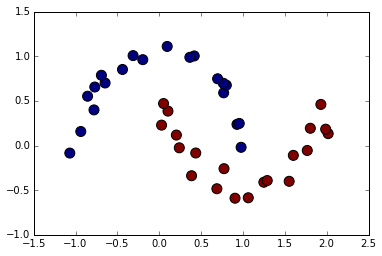

In [66]:
from sklearn.datasets import make_moons
X, y = make_moons(noise = 0.1, random_state=1, n_samples=40)
plt.scatter(X[:,0],X[:,1], c = y, s = 100)

/home/thomas/anaconda3/lib/python3.4/site-packages/sklearn/datasets/samples_generator.py:612: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = np.hstack([np.zeros(n_samples_in, dtype=np.intp),


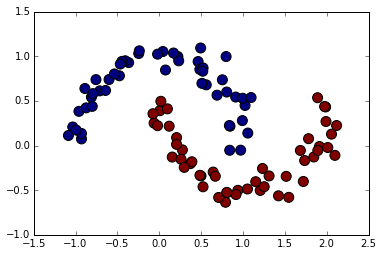

In [67]:
X_test, y_test = make_moons(noise = 0.1, random_state=321)
plt.scatter(X_test[:,0],X_test[:,1], c = y_test, s = 100)

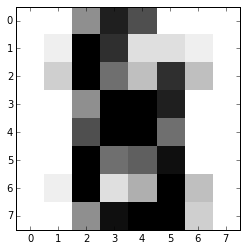

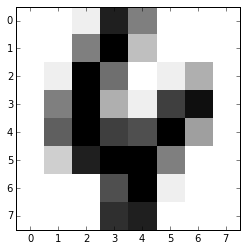

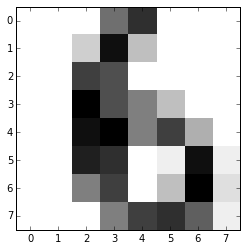

X_train :899 exemples, avec 8*8 = 64 features.


# Exercices Bonus : 
    
    - Entrainer un arbre de décision pour classer les données des chiffres manuscrits. 
    - Entrainer un SVM meilleur que cette arbre de décision

In [ ]:
# Charger des données de chiffre manuscrit (1800 images de 8x8)

from sklearn import datasets

digits = datasets.load_digits()
images = digits.images
n_samples = len(digits.images)

X = images.reshape((n_samples, -1))
y = digits.target

for image in images[np.random.choice(range(n_samples),3)]:
    plt.figure()
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    
    
X_train = X[n_samples / 2:]
y_train = y[n_samples / 2:]

X_valid = X[:n_samples / 2]
y_valid = y[:n_samples / 2]

print("X_train : {} exemples, avec 8*8 = {} features.".format(X_train.shape[0], X_train.shape[1]))